# TELECOM_CUSTOMER_CHURN_PREDICTION.

In [1]:
# Importing some of the libraries.
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading the Dataset.
data = pd.read_csv('/Users/tarakram/Documents/telecom_customer_churn/Telecom_customer_churn_Prediction./Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the Data.
+ customerID: A unique identifier assigned to each customer.
+ gender: The gender of the customer (male or female).
+ SeniorCitizen: A binary variable indicating whether the customer is a senior citizen or not (1 for senior citizen and 0 for non-senior citizen).
+ Partner: A binary variable indicating whether the customer has a partner or not (1 for yes and 0 for no).
+ Dependents: A binary variable indicating whether the customer has dependents or not (1 for yes and 0 for no).
+ tenure: The number of months the customer has been with the telecom company.
+ PhoneService: A binary variable indicating whether the customer has a phone service or not (1 for yes and 0 for no).
+ MultipleLines: A binary variable indicating whether the customer has multiple phone lines or not (1 for yes and 0 for no).
+ InternetService: The type of internet service the customer has subscribed to (DSL, Fiber optic, or No).
+ OnlineSecurity: A binary variable indicating whether the customer has online security or not (1 for yes and 0 for no).
+ OnlineBackup: A binary variable indicating whether the customer has online backup or not (1 for yes and 0 for no).
+ DeviceProtection: A binary variable indicating whether the customer has device protection or not (1 for yes and 0 for no).
+ TechSupport: A binary variable indicating whether the customer has technical support or not (1 for yes and 0 for no).
+ StreamingTV: A binary variable indicating whether the customer has streaming TV or not (1 for yes and 0 for no).
+ StreamingMovies: A binary variable indicating whether the customer has streaming movies or not (1 for yes and 0 for no).
+ Contract: The type of contract the customer has subscribed to (Month-to-month, One year, or Two year).
+ PaperlessBilling: A binary variable indicating whether the customer has opted for paperless billing or not (1 for yes and 0 for no).
+ PaymentMethod: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)).
+ MonthlyCharges: The amount charged to the customer on a monthly basis.
+ TotalCharges: The total amount charged to the customer over the entire tenure period.
+ Churn: A binary variable indicating whether the customer has churned or not (1 for churned and 0 for retained).

In [3]:
print(f'Our Data has {data.shape[0]} rows, and {data.shape[1]} Columns.')

Our Data has 7043 rows, and 21 Columns.


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Most of the data is in Objects, and Machines only understand numbers, so are going to change them into int in preprocessing module.

In [6]:
# Lets see the Descriptive Statistics.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we have three columns.
seniorCitizen is a categorical variable so it only have 0 or 1.<br>
The average Tenure - 32 months, and 75% customers are less than 55 months.<br>
The Average Monthly Charges are 64 dollars, and 75% customers pay less than 89 Dollars.

In [7]:
# Lets Explore the Churn Column.
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can clearly See that we have imbalanced data, having customers of NO-5174, and customer of YES-1869.

In [8]:
# If we see the Percentage.
100*data['Churn'].value_counts()/len(data['Churn'])


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [9]:
# WE have 73% NO, and 26% YES - This is generally Happens because a user usally stick to one telecom.
# until and unless he/she faces problems.
# We have imbalance Data - techniques( oversampling, undersampling)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning.

In [11]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [12]:
data.drop('customerID', axis = 1, inplace = True)

In [13]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.duplicated().sum()

22

In [15]:
data.dropna(axis = 0, inplace = True)

## EDA

In [16]:
# Now lets come the most interesting part, getting insights from the data.
# Lets plot some Graphs inorder to understand the data better.
# importing the libraries that are needed for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

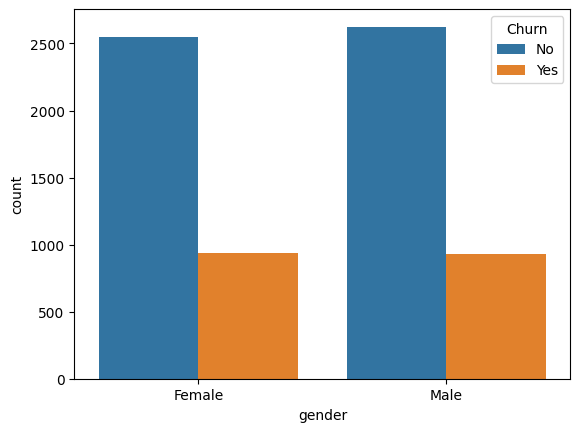

In [17]:
sns.countplot(x = 'gender', hue = 'Churn', data = data)
plt.show()

Insights - The Gender Male and Female are having the almost same number of churn and non-churn members.

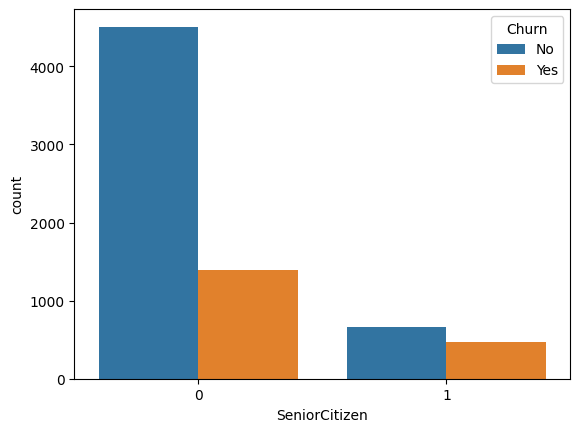

In [18]:
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = data)
plt.show()

insights - Here the data is imbalanced, but the senior citizens who around 800, having churn rate of 70%, when compared to 40% of non seniorcitizens.

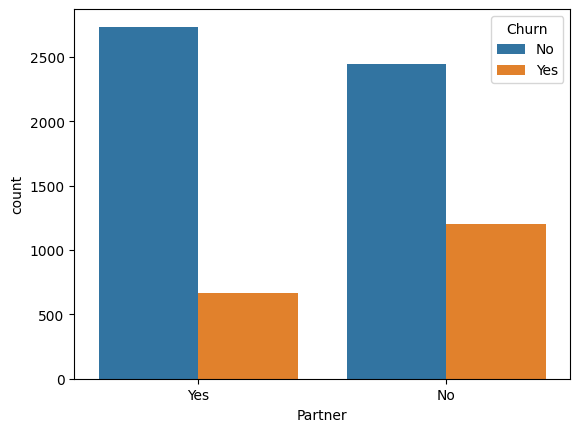

In [19]:
sns.countplot(x = 'Partner', hue = 'Churn', data = data)
plt.show()

Insights - We can clearly see that not having a patner is tends to have a high churn rate, when compared to having a patner.

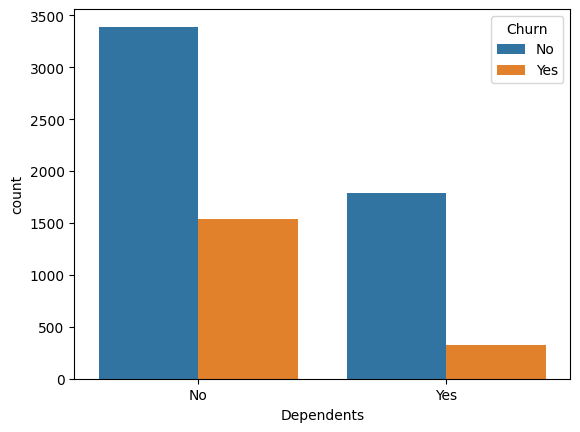

In [20]:
sns.countplot(x = 'Dependents', hue = 'Churn', data = data)
plt.show()

Insights - WE can see that non-dependents are having the high churn rate which is like 50%.

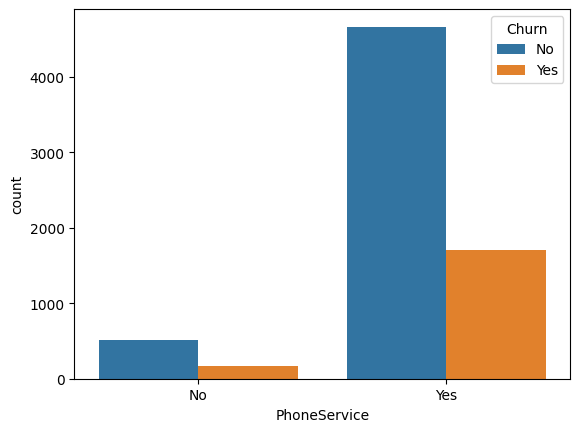

In [21]:
sns.countplot(x = 'PhoneService', hue = 'Churn', data = data)
plt.show()

Insights - This is common Having a phone service are tends to high, and they are the people who are going to buy and churn.

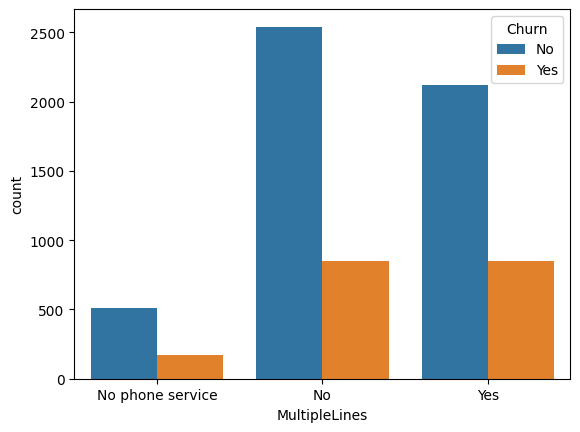

In [22]:
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = data)
plt.show()

Insights - If we clearly Observe having multiple lines tends to have more churn rates, as well as not having the multiple lines also have high churn rate...interesting!

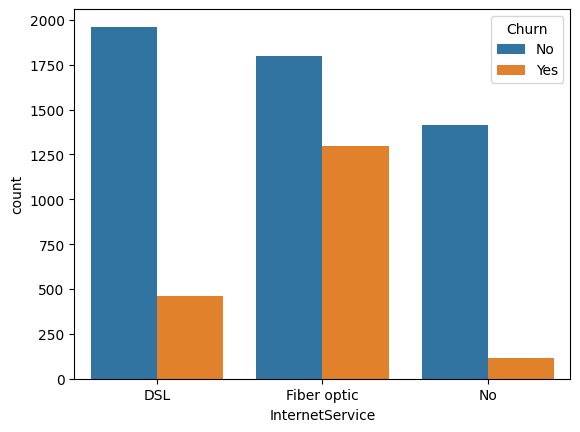

In [23]:
sns.countplot(x = 'InternetService', hue = 'Churn', data = data)
plt.show()

Insights - We can see that Having the Fiber Optic Internet service are having high Churn rate which is almost 80%.

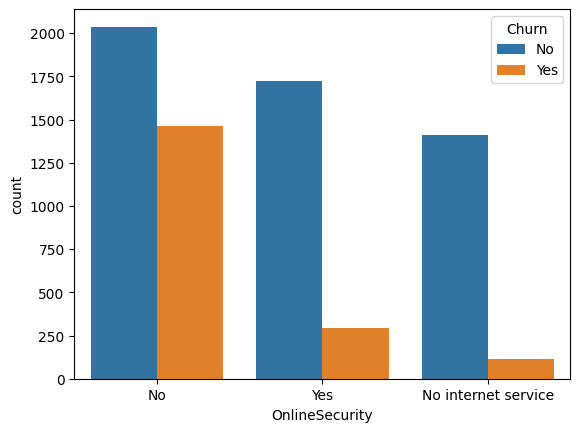

In [24]:
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = data)
plt.show()

Insights - WE can see that not having enough security tends to lead the high Churn Rate.

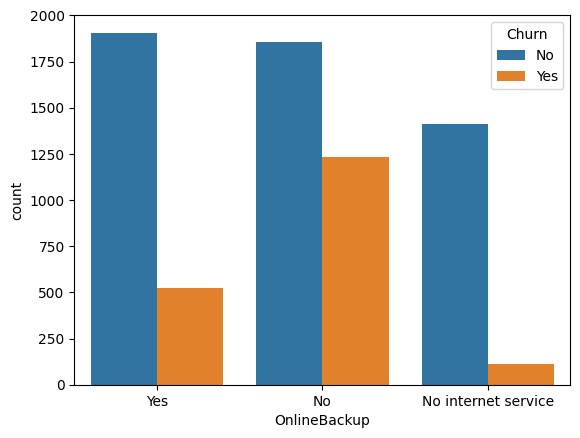

In [25]:
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = data)
plt.show()

Insights - WE can see that not having enough no online Backup tends to lead the high Churn Rate.

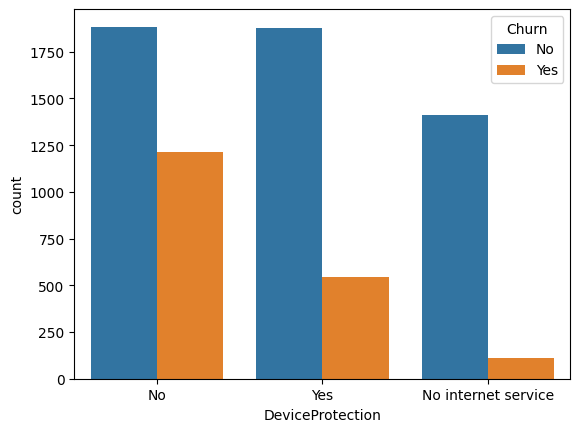

In [26]:
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = data)
plt.show()

Insights - WE can see that not having Device protection tends to lead the high Churn Rate.

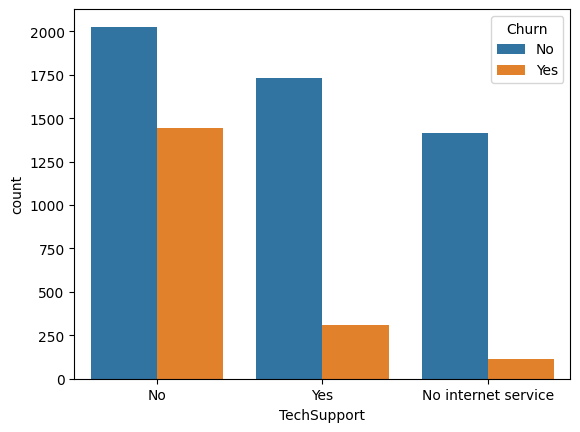

In [27]:
sns.countplot(x = 'TechSupport', hue = 'Churn', data = data)
plt.show()

Insights - WE can see that not having Tech Support tends to lead the high Churn Rate.

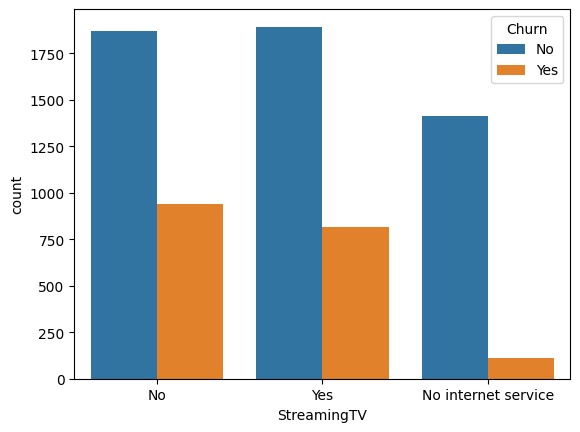

In [28]:
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = data)
plt.show()

Insights - WE can see that not having streaming TV tends to lead the high Churn Rate, and the having the streaming TV also have high churn rate.

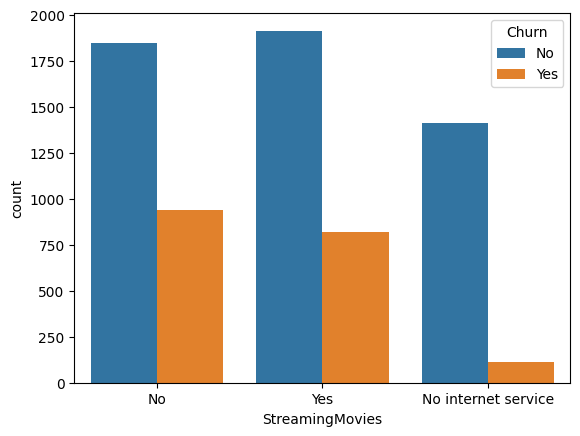

In [29]:
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = data)
plt.show()

Insights - WE can see that the customers who didn't watch movies often are tend to have high churn rate when compared to the customers who watch... interestingly the customers are high in volume who watch movies.

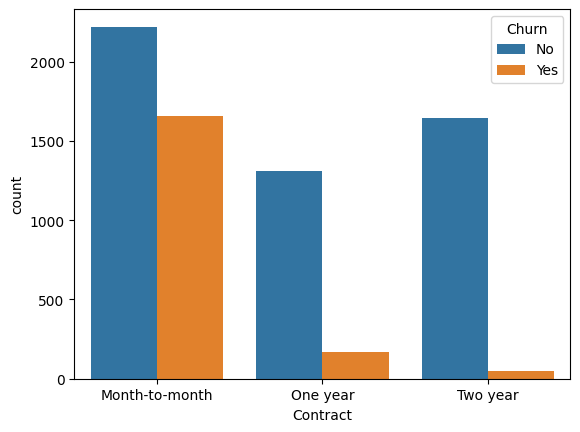

In [30]:
sns.countplot(x = 'Contract', hue = 'Churn', data = data)
plt.show()

Insights - This is the best Insights till now, the more you are in contract the less you churn, we can see that month-to-month customers are having the high churn rate which is almost more than 80%.

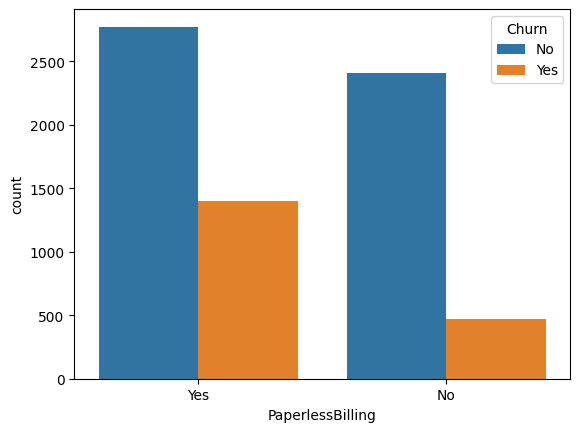

In [31]:
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = data)
plt.show()

Insights - Having the paperless billing also leads to churn rate, because the customers didn't wanted to fill the lot of forms. thats actually the human psychology.

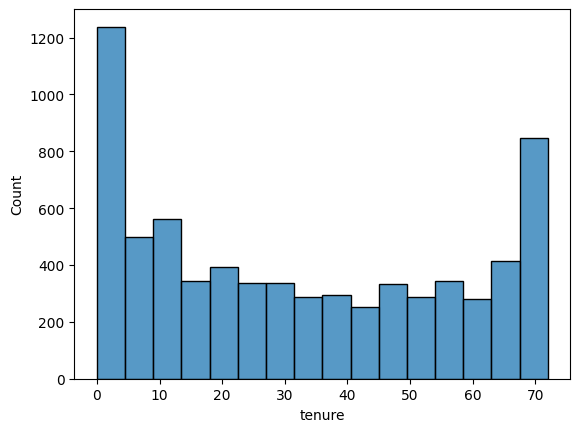

In [32]:
sns.histplot(x = 'tenure', data = data)
plt.show()

## Data Pre-Processing

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [34]:
# We have to Change the all these values into numeric,because Machines can understand only numbers.

In [35]:
# Let's Explore one more time the dataframe, on which we can apply the label encoding.
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df = data.copy()

In [37]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

#### We first Check if the data has two variables, if yes, then we do the label encoding and then we convert them into numeric.

In [53]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [54]:
df['gender'] = lb.fit_transform(df['gender'])

In [55]:
df['gender'].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

1 - Male and 0 - Female.

In [56]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [57]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [58]:
df['Partner'] = lb.fit_transform(df['Partner'])

In [59]:
df['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

0 - No patner and 1 - Having a patner

In [60]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [61]:
df['Dependents'] = lb.fit_transform(df['Dependents'])

In [62]:
df['Dependents'].value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

0 - Not having the Dependents and 1 - Having Dependents.

In [63]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [64]:
df['PhoneService'] = lb.fit_transform(df['PhoneService'])

In [65]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

 1 - Having Phone Service and 0 - Not having the phone Service.

In [66]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

#Here we can replace the no phone service as No, because when I compare to the phone service column, having No phone service leads to No multiplelines. If we have a mobile then only we can make otherwise we can't have multiple lines.

In [67]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [68]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [69]:
df['MultipleLines'] = lb.fit_transform(df['MultipleLines'])

In [70]:
df['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

0 - No multiplelines and 1 - multiplelines.

In [71]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [72]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [73]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [74]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [75]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [76]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [77]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [78]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [79]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [80]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [81]:
# Here we are having three variables, so we can use Onehot Encoding(later)

In [82]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [83]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [84]:
df['PaperlessBilling'] = lb.fit_transform(df['PaperlessBilling'])

In [85]:
df['PaperlessBilling'].value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

1 - Having Paperlessbilling and 0 - NO paperlessbilling

In [86]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [87]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [88]:
df['Churn'] = lb.fit_transform(df['Churn'])

In [89]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

0 - No Churn and 1 - Churn

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [91]:
# We have -- Internet service, Multiplelines, internet security, online backup, device protection, tech support, streaming tv,streaming movies, contract
# Here we use get_Dummies to convert them into numeric.

In [92]:
new_df = pd.get_dummies(df,columns = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','PaymentMethod','StreamingMovies','Contract'])

In [93]:
new_df.shape

(7043, 39)

In [94]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,1,29.85,29.85,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,0,56.95,1889.5,...,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,2,1,0,1,53.85,108.15,...,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,0,42.30,1840.75,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,0,1,70.70,151.65,...,0,0,1,0,1,0,0,1,0,0


In [95]:
new_df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

In [96]:
# Saving this DataFrame into new_csv file.
new_df.to_csv('cleaned_telecom_data.csv')

In [97]:
new_df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.011754,-0.014569,-0.008612,...,-0.016024,0.001215,0.000752,0.013744,0.005374,0.006026,-0.010487,-0.003386,0.008026,-0.003695
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.156530,0.220173,0.150889,...,-0.016159,-0.024135,0.171718,-0.153477,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.014877,0.096848,-0.150448,...,0.110706,0.082029,-0.083852,-0.095125,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.111377,-0.113890,-0.164221,...,0.052021,0.060267,-0.150642,0.059071,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.006152,0.247900,-0.352229,...,0.243510,0.233006,-0.208363,-0.233852,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.016505,0.247398,0.011942,...,0.007556,-0.007721,0.003062,-0.003319,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.163530,0.490434,0.040102,...,0.075527,0.060048,0.083618,-0.227206,-0.080450,-0.210564,0.258751,-0.088203,-0.003794,0.106253
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,0.163530,1.000000,0.352150,0.191825,...,-0.016332,-0.013589,0.208865,-0.205398,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.490434,0.352150,1.000000,0.193356,...,0.042812,0.030550,0.271625,-0.377437,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,0.191825,0.193356,1.000000,...,-0.117937,-0.134302,0.301919,-0.091683,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253


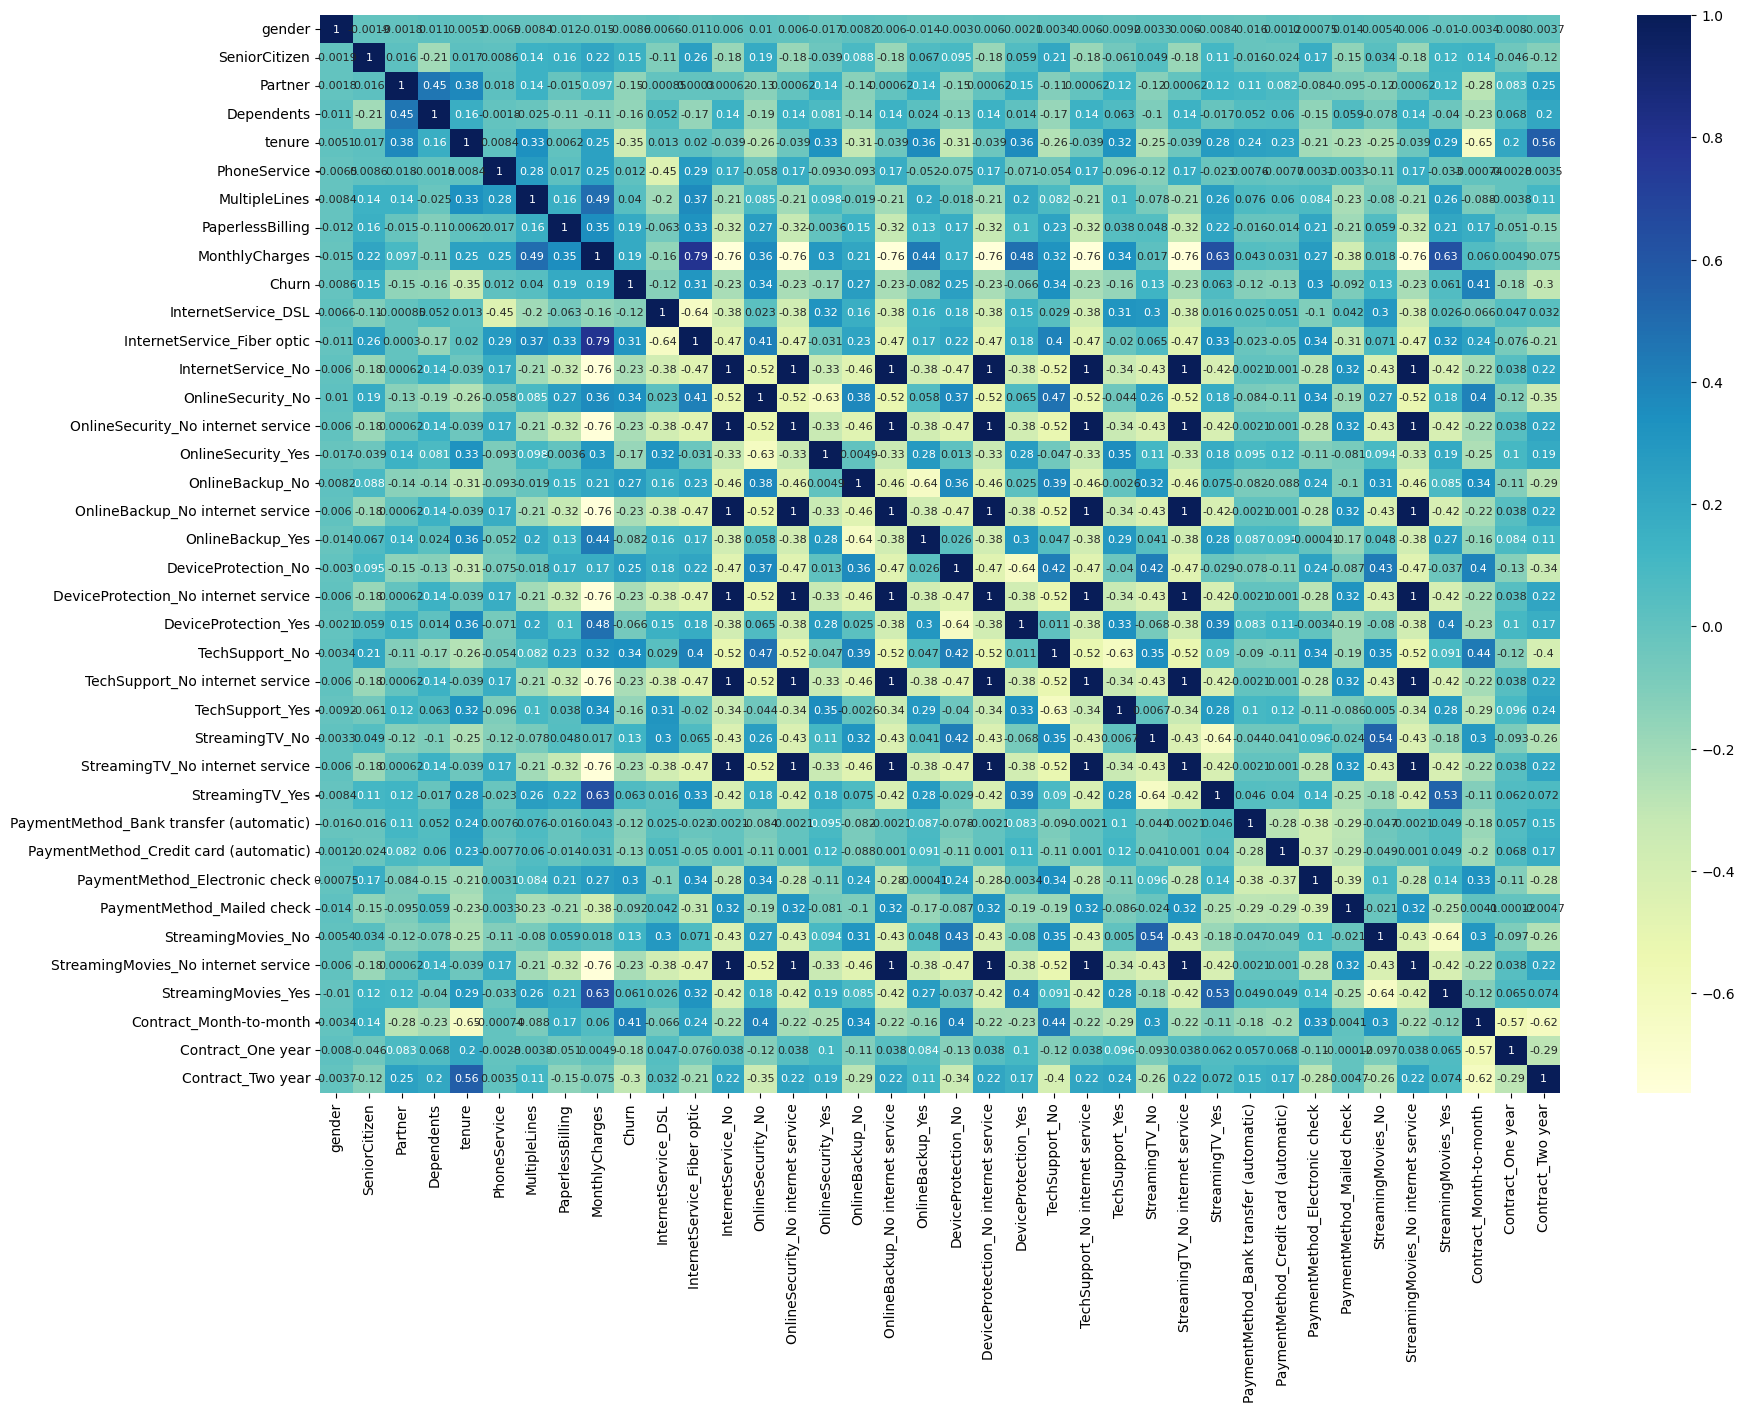

In [98]:
# it is really Hard to see the Correaltion here in the table. Lets plot Heatmap.
plt.figure(figsize= (20,14))
sns.heatmap(new_df.corr(),cmap='YlGnBu', annot = True,annot_kws={'fontsize': 8})
plt.show()

In [99]:
# It is Really Hard to Understand the Correaltion in the big picture, but we have to see.

In [100]:
# We can see there is a perfect correaltion in no internet service.

In [101]:
# So lets get back to our original dataset, and fix this.

In [102]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [103]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [104]:
# No Internet Service means No online security, until and unless you have a internet acessable you can have online security.

In [105]:
# We are replacing the No internet service to 0 
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service','No')

In [106]:
df['OnlineSecurity'] = lb.fit_transform(df['OnlineSecurity'])

In [107]:
df['OnlineSecurity'].value_counts()

0    5024
1    2019
Name: OnlineSecurity, dtype: int64

In [108]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [109]:
# We are replacing the No internet service to 0 
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service','No')

In [110]:
df['OnlineBackup'] = lb.fit_transform(df['OnlineBackup'])

In [111]:
df['OnlineBackup'].value_counts()

0    4614
1    2429
Name: OnlineBackup, dtype: int64

In [112]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [113]:
# We are replacing the No internet service to 0 
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service','No')

In [114]:
df['DeviceProtection'] = lb.fit_transform(df['DeviceProtection'])

In [115]:
df['DeviceProtection'].value_counts()

0    4621
1    2422
Name: DeviceProtection, dtype: int64

In [116]:
 df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [117]:
# We are replacing the No internet service to 0 
df['TechSupport'] = df['TechSupport'].replace('No internet service','No')

In [118]:
df['TechSupport'] = lb.fit_transform(df['TechSupport'])

In [119]:
df['TechSupport'].value_counts()

0    4999
1    2044
Name: TechSupport, dtype: int64

In [120]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [121]:
# We are replacing the No internet service to 0 
df['StreamingTV'] = df['StreamingTV'].replace('No internet service','No')

In [122]:
df['StreamingTV'] = lb.fit_transform(df['StreamingTV'])

In [123]:
df['StreamingTV'].value_counts()

0    4336
1    2707
Name: StreamingTV, dtype: int64

In [124]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [125]:
# We are replacing the No internet service to 0 
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service','No')

In [126]:
df['StreamingMovies'] = lb.fit_transform(df['StreamingMovies'])

In [127]:
df['StreamingMovies'].value_counts()

0    4311
1    2732
Name: StreamingMovies, dtype: int64

In [128]:
#lets see the data frame once 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [130]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   int64 
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   int64 
 3   Dependents        7043 non-null   int64 
 4   tenure            7043 non-null   int64 
 5   PhoneService      7043 non-null   int64 
 6   MultipleLines     7043 non-null   int64 
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   int64 
 9   OnlineBackup      7043 non-null   int64 
 10  DeviceProtection  7043 non-null   int64 
 11  TechSupport       7043 non-null   int64 
 12  StreamingTV       7043 non-null   int64 
 13  StreamingMovies   7043 non-null   int64 
 14  Contract          7043 non-null   object
 15  PaperlessBilling  7043 non-null   int64 
 16  PaymentMethod     7043 non-null   object
 17  MonthlyCharges

In [132]:
# Now we can convert them into encoding variables by using gget_dummies.

In [133]:
new_df1 = pd.get_dummies(df,columns = ['InternetService','Contract','PaymentMethod'])

In [134]:
new_df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [135]:
new_df1.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [136]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   gender                                   7043 non-null   int64 
 1   SeniorCitizen                            7043 non-null   int64 
 2   Partner                                  7043 non-null   int64 
 3   Dependents                               7043 non-null   int64 
 4   tenure                                   7043 non-null   int64 
 5   PhoneService                             7043 non-null   int64 
 6   MultipleLines                            7043 non-null   int64 
 7   OnlineSecurity                           7043 non-null   int64 
 8   OnlineBackup                             7043 non-null   int64 
 9   DeviceProtection                         7043 non-null   int64 
 10  TechSupport                              7043 non-null   int

In [137]:
new_df1['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [138]:
new_df1['TotalCharges'] = pd.to_numeric(new_df1.TotalCharges, errors='coerce')


In [139]:
# Replace empty or blank strings with default value
new_df1['TotalCharges'] = new_df1['TotalCharges'].astype(float)

In [140]:
new_df1.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_Month-to-month                     0
Contract_One year                 

In [141]:
new_df1.dropna(axis = 0, inplace =True )

In [142]:
new_df1.shape

(7032, 27)

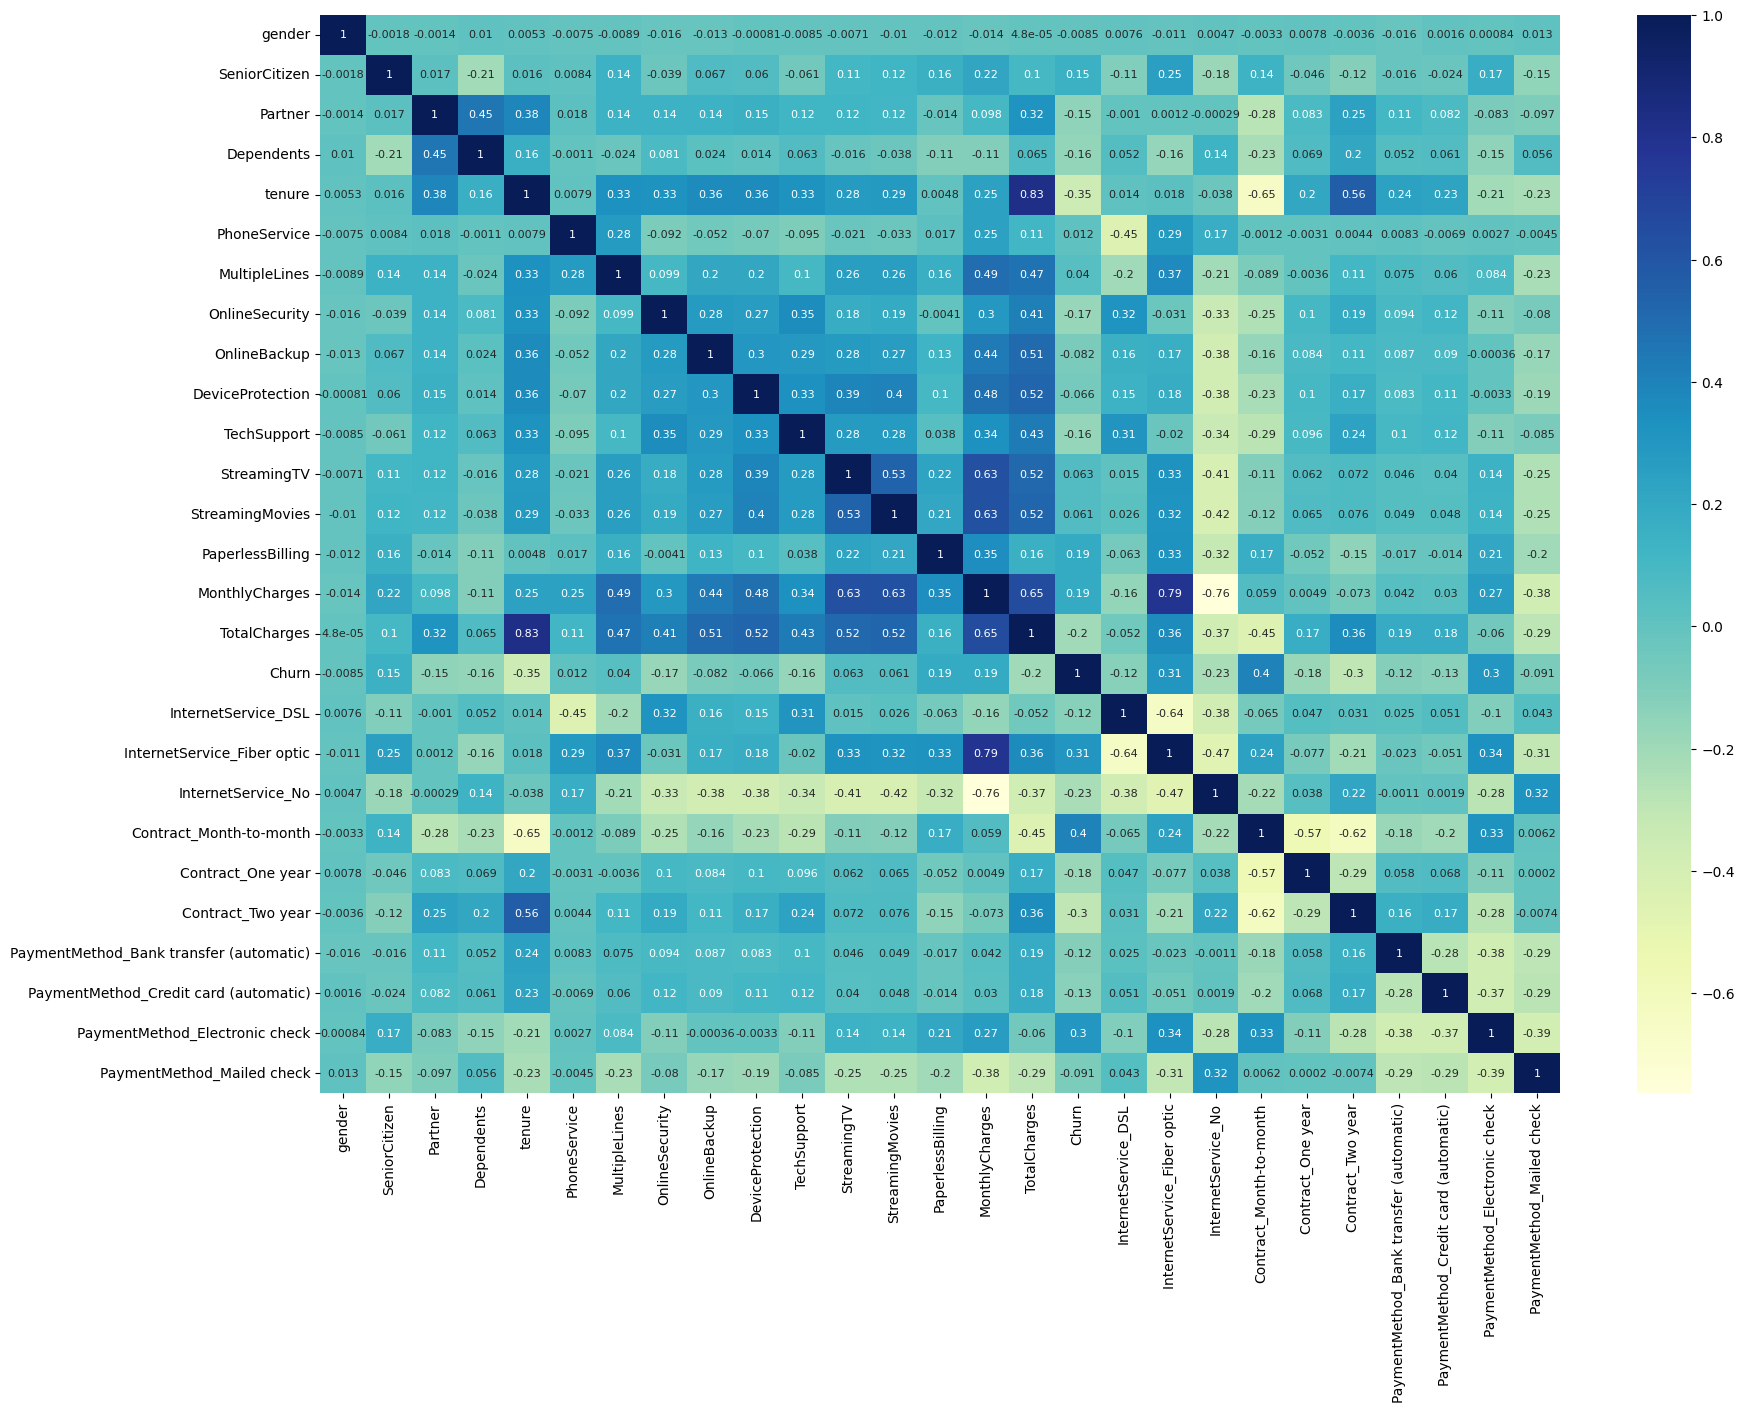

In [143]:
plt.figure(figsize= (20,14))
sns.heatmap(new_df1.corr(),cmap='YlGnBu', annot = True,annot_kws={'fontsize': 8})
plt.show()

In [144]:
# Now we can see there is no perfect realtionship between any variables.

In [145]:
new_df1.to_csv('modified_data.csv')

## Feature Selection

Our Target Variable is **Churn** - so we mainly focus on the target variable.
+ contract-month-to-month had good correalation with Churn.
+ PaymentMethod_Electronic Check Had Good correaltion with Churn.
+ Other have some postive as well as negative corelations.

In [146]:
# As of now WE are taking all the Features for the Model building.

## Splitting the Data.

In [147]:
X = new_df1.drop('Churn', axis = 1)

In [148]:
y = new_df1['Churn']

In [149]:
X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [150]:
X.shape

(7032, 26)

In [151]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [152]:
y.shape

(7032,)

## Model Building.

In [161]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [162]:
X_train,X_test,y_train,y_test = tts(X,y,test_size= 0.2, random_state= 42)

In [163]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0,43,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,1,0,0,0,3,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5483,0,0,1,0,55,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5524,1,0,1,1,45,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6337,0,0,1,1,55,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [164]:
X_train.shape

(5625, 26)

In [165]:
X_test.shape

(1407, 26)

In [166]:
y_train.head()

6030    1
3410    1
5483    1
5524    0
6337    0
Name: Churn, dtype: int64

In [167]:
y_train.shape

(5625,)

In [168]:
y_test.shape

(1407,)

## LogisticRegression

In [169]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [170]:
y_pred = lg.predict(X_test)

In [171]:
lg.score(X_test, y_pred)

1.0

In [172]:
accuracy_score(y_test,y_pred)

0.7910447761194029

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [174]:
print(metrics.confusion_matrix(y_pred, y_test))

[[916 177]
 [117 197]]


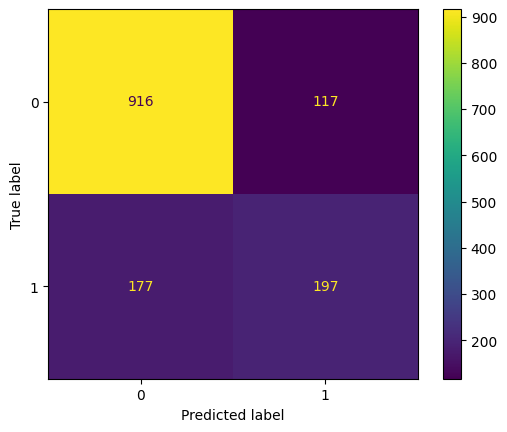

In [175]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Navie Bayes.

In [176]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [177]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [178]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [179]:
gnb.fit(X_train,y_train)

GaussianNB()

In [180]:
y_pred1 = bnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = gnb.predict(X_test)

In [181]:
print(bnb.score(X_test, y_pred1))
print(mnb.score(X_test, y_pred2))
print(gnb.score(X_test, y_pred3))

1.0
1.0
1.0


In [182]:
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))

0.7469793887704336
0.67590618336887
0.7292110874200426


In [183]:
# For BNB
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1033
           1       0.52      0.67      0.59       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.75      0.76      1407



In [184]:
# For MNB
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1033
           1       0.44      0.74      0.55       374

    accuracy                           0.68      1407
   macro avg       0.65      0.70      0.65      1407
weighted avg       0.76      0.68      0.69      1407



In [185]:
# For GNB
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.49      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [186]:
# for BNB
print(metrics.confusion_matrix(y_pred1, y_test))

[[799 122]
 [234 252]]


In [187]:
# For MNB
print(metrics.confusion_matrix(y_pred2, y_test))

[[674  97]
 [359 277]]


In [188]:
# For GNB
print(metrics.confusion_matrix(y_pred3, y_test))

[[740  88]
 [293 286]]


## DecisionTreeClassifier

In [189]:
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [190]:
y_pred = dtc.predict(X_test)

In [191]:
print(dtc.score(X_test, y_pred))

1.0


In [192]:
print(accuracy_score(y_test,y_pred))

0.775408670931059


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.58      0.55      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [194]:
print(metrics.confusion_matrix(y_pred, y_test))

[[887 170]
 [146 204]]


## RandomForestClassifier.

In [195]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [196]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [197]:
y_pred = rfc.predict(X_test)

In [198]:
print(rfc.score(X_test, y_pred))

1.0


In [199]:
print(accuracy_score(y_test,y_pred))

0.7853589196872779


In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



In [201]:
100*new_df1['Churn'].value_counts()/len(new_df1['Churn'])

0    73.421502
1    26.578498
Name: Churn, dtype: float64

In [202]:
# WE already discussed that Our dataset is imbalanced. here we are using oversampling Techniques.

## SMOTE

In [203]:
sm = SMOTEENN() # using SMOTE.
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [204]:
X_train1,X_test1,y_train1,y_test1=tts(X_resampled1, y_resampled1,test_size=0.2)

In [205]:
# Our Data is oversampled Using SMOTE.
# Now we will see all the models once again after oversampling.

## LogisticRegression After SMOTE.

In [206]:
lgs = LogisticRegression()
lgs.fit(X_train1,y_train1)

LogisticRegression()

In [207]:
yr_pred1 = lgs.predict(X_test1)

In [208]:
lgs.score(X_test1,yr_pred1)

1.0

In [209]:
print(accuracy_score(y_test1,yr_pred1))

0.9324090121317158


In [210]:
print(metrics.classification_report(y_test1, yr_pred1))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       532
           1       0.93      0.94      0.94       622

    accuracy                           0.93      1154
   macro avg       0.93      0.93      0.93      1154
weighted avg       0.93      0.93      0.93      1154



In [211]:
print(metrics.confusion_matrix(y_test1, yr_pred1))

[[491  41]
 [ 37 585]]


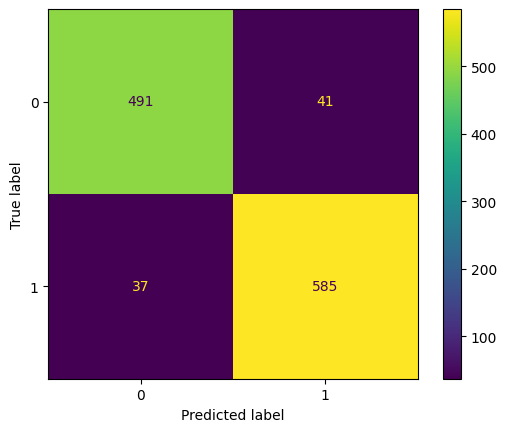

In [212]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Navie Bayes after SMOTE

In [213]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()

In [214]:
bnb.fit(X_train1,y_train1)

BernoulliNB()

In [215]:
mnb.fit(X_train1,y_train1)

MultinomialNB()

In [216]:
gnb.fit(X_train1,y_train1)

GaussianNB()

In [217]:
yr_pred1 = bnb.predict(X_test1)
yr_pred2 = mnb.predict(X_test1)
yr_pred3 = gnb.predict(X_test1)

In [218]:
print(bnb.score(X_test1, yr_pred1))
print(mnb.score(X_test1, yr_pred2))
print(gnb.score(X_test1, yr_pred3))

1.0
1.0
1.0


In [219]:
print(accuracy_score(y_test1,yr_pred1))
print(accuracy_score(y_test1,yr_pred2))
print(accuracy_score(y_test1,yr_pred3))

0.8960138648180243
0.8362218370883883
0.9003466204506065


In [220]:
# For BNB
print(classification_report(y_test1, yr_pred1))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       532
           1       0.89      0.92      0.90       622

    accuracy                           0.90      1154
   macro avg       0.90      0.89      0.90      1154
weighted avg       0.90      0.90      0.90      1154



In [221]:
# For MNB
print(classification_report(y_test1, yr_pred2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       532
           1       0.86      0.83      0.85       622

    accuracy                           0.84      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.84      0.84      0.84      1154



In [222]:
# For GNB
print(classification_report(y_test1, yr_pred3))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       532
           1       0.92      0.90      0.91       622

    accuracy                           0.90      1154
   macro avg       0.90      0.90      0.90      1154
weighted avg       0.90      0.90      0.90      1154



In [223]:
print(metrics.confusion_matrix(y_test1, yr_pred1))

[[464  68]
 [ 52 570]]


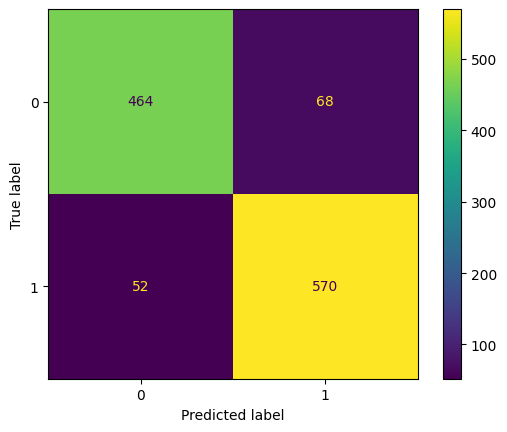

In [224]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [225]:
print(metrics.confusion_matrix(y_test1, yr_pred2))

[[448  84]
 [105 517]]


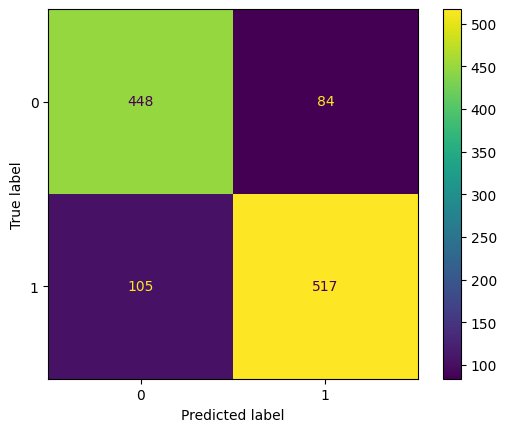

In [226]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [227]:
print(metrics.confusion_matrix(y_test1, yr_pred3))

[[482  50]
 [ 65 557]]


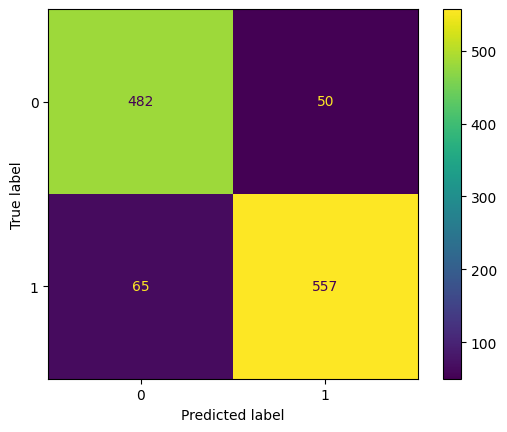

In [228]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## DecisionTreeClassifier after SMOTE

In [229]:
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dtc.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [230]:
yr_pred = dtc.predict(X_test1)

In [231]:
print(dtc.score(X_test1, yr_pred))

1.0


In [232]:
print(accuracy_score(y_test1,yr_pred))

0.9211438474870017


In [233]:
print(classification_report(y_test1, yr_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       532
           1       0.93      0.92      0.93       622

    accuracy                           0.92      1154
   macro avg       0.92      0.92      0.92      1154
weighted avg       0.92      0.92      0.92      1154



In [234]:
print(metrics.confusion_matrix(y_test1, yr_pred))

[[490  42]
 [ 49 573]]


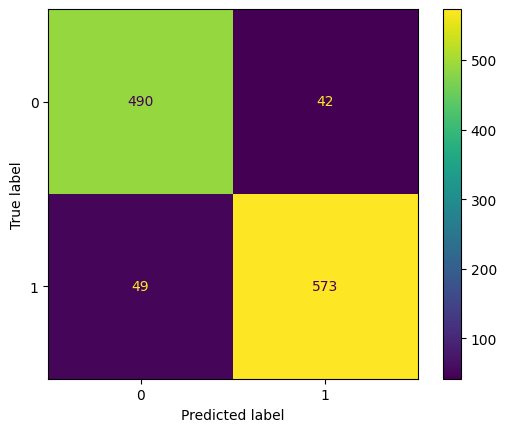

In [235]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## RandomForestClassifier after SMOTE

In [236]:
rfcr=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)



In [237]:
rfcr.fit(X_train1,y_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [238]:
yr_pred1 = rfcr.predict(X_test1)

In [239]:
rfcr.score(X_test1, y_test1)

0.9341421143847487

In [240]:
print(metrics.classification_report(y_test1, yr_pred1))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       532
           1       0.92      0.96      0.94       622

    accuracy                           0.93      1154
   macro avg       0.94      0.93      0.93      1154
weighted avg       0.94      0.93      0.93      1154



In [241]:
print(metrics.confusion_matrix(y_test1, yr_pred1))

[[479  53]
 [ 23 599]]


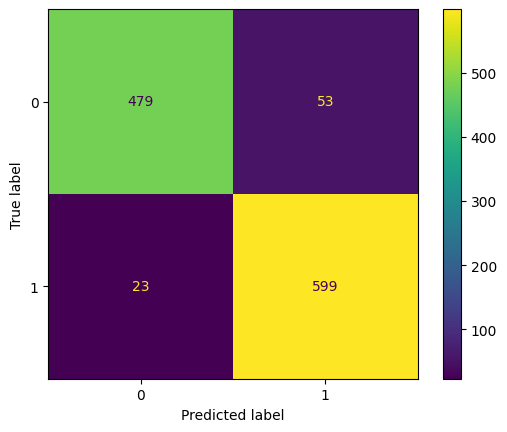

In [242]:
confusion_matrix = metrics.confusion_matrix(y_test1,yr_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Saving the Model.

1. LogisticRegression - F1 score 95 and Precision score 95
2. DecisionTreeClassifier - F1 score 94 and precision score 93
3. RandomForestClassifier - F1 score 95, and Precision score 93

So we Are going with the LogisticRegression Model for our futue Predictions.

In [243]:
import pickle

In [244]:
pickle.dump(lgs, open('churn_predictor_model.pkl', 'wb'))

In [245]:
# Checking if our model is working or not. 
load_model = pickle.load(open('churn_predictor_model.pkl', 'rb'))

In [246]:
load_model = load_model.score(X_test1,yr_pred1)

In [247]:
load_model

0.9618717504332756

In [248]:
# See our model is Working Very Well.

**Give A Star to this Repository**

**Future Work**
+ Loading more data, can lead to better predictions.
+ Deployment of this model into Production.